In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split, KFold, cross_val_score , cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, precision_recall_fscore_support as score

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
!rm *.*
!ls

rm: cannot remove '*.*': No such file or directory
sample_data


In [3]:
!wget https://raw.githubusercontent.com/manojknit/PySpark_Python-ML-Models/master/dataset/critical-assessment-amazon-reviews-on-kindle/1429_1.csv


--2018-12-12 05:32:23--  https://raw.githubusercontent.com/manojknit/PySpark_Python-ML-Models/master/dataset/critical-assessment-amazon-reviews-on-kindle/1429_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48993673 (47M) [text/plain]
Saving to: ‘1429_1.csv’

1429_1.csv          100%[===================>]  46.72M   144MB/s    in 0.3s    

2018-12-12 05:32:25 (144 MB/s) - ‘1429_1.csv’ saved [48993673/48993673]



## 1.Data understanding 

I have chosen the dataset with more than 350000 records for performing better  classification

In [4]:
dt = pd.read_csv('1429_1.csv',low_memory=False)

dt.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']
dt.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


###Describing the data

In [5]:
dt.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'date', 'dateAdded', 'dateSeen', 'didPurchase', 'doRecommend', 'id',
       'numHelpful', 'rating', 'sourceURLs', 'text', 'title', 'userCity',
       'userProvince', 'username'],
      dtype='object')

In [6]:
dt.shape

(34660, 21)

In [7]:
print(dt.dtypes)

id               object
name             object
asins            object
brand            object
categories       object
keys             object
manufacturer     object
date             object
dateAdded        object
dateSeen         object
didPurchase      object
doRecommend      object
id              float64
numHelpful      float64
rating          float64
sourceURLs       object
text             object
title            object
userCity        float64
userProvince    float64
username         object
dtype: object


In [8]:
dt.describe()

,id,id,numHelpful,rating,userCity,userProvince
count,34660,1.0,34131.000000,34627.000000,0.0,0.0
unique,42,NaN,NaN,NaN,NaN,NaN
top,AVphgVaX1cnluZ0-DR74,NaN,NaN,NaN,NaN,NaN
freq,10966,NaN,NaN,NaN,NaN,NaN
mean,NaN,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,NaN,13.215775,0.735653,NaN,NaN
min,NaN,111372787.0,0.000000,1.000000,NaN,NaN
25%,NaN,111372787.0,0.000000,4.000000,NaN,NaN
50%,NaN,111372787.0,0.000000,5.000000,NaN,NaN
75%,NaN,111372787.0,0.000000,5.000000,NaN,NaN


In [9]:
dt.nunique()

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id              34660 non-null object
name            27900 non-null object
asins           34658 non-null object
brand           34660 non-null object
categories      34660 non-null object
keys            34660 non-null object
manufacturer    34660 non-null object
date            34621 non-null object
dateAdded       24039 non-null object
dateSeen        34660 non-null object
didPurchase     1 non-null object
doRecommend     34066 non-null object
id              1 non-null float64
numHelpful      34131 non-null float64
rating          34627 non-null float64
sourceURLs      34660 non-null object
text            34659 non-null object
title           34655 non-null object
userCity        0 non-null float64
userProvince    0 non-null float64
username        34658 non-null object
dtypes: float64(5), object(16)
memory usage: 5.6+ MB


### Remove unwanted columns

In [0]:
dt.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

###  Finding and Visualizaing null values

In [12]:
dt.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

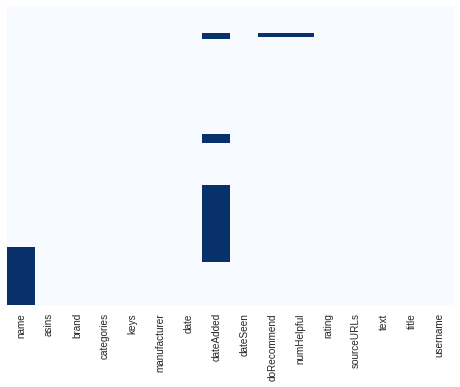

In [13]:
# to check missing values
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False,cmap='Blues')

### Exploratory data set analysis and visualization

### Generate correlation matrix

In [14]:

c = dt.corr()   
c

,numHelpful,rating
numHelpful,1.000000,-0.042395
rating,-0.042395,1.000000


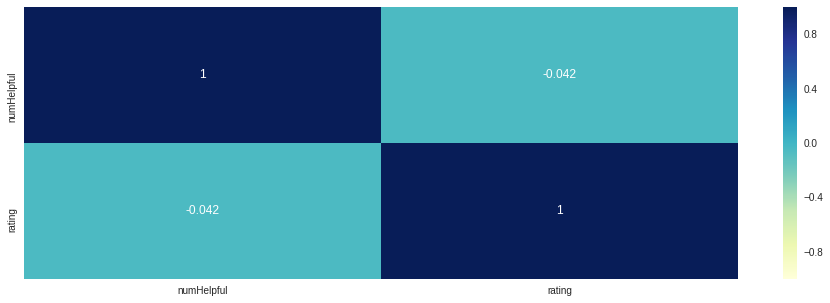

In [15]:
plt.figure(figsize = (16,5))
sns.heatmap(c, annot=True, cmap='YlGnBu')

In [0]:
#labelencoder = LabelEncoder()
#dt['Recommend'] = labelencoder.fit_transform(dt[['doRecommend']])

In [17]:
dt.head(10)

,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,doRecommend,numHelpful,rating,sourceURLs,text,title,username
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,tklit
6,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,Droi
7,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,Kacy
8,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:44:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Great as a device to read books. I like that i...,Great for reading,Weebee
9,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPa

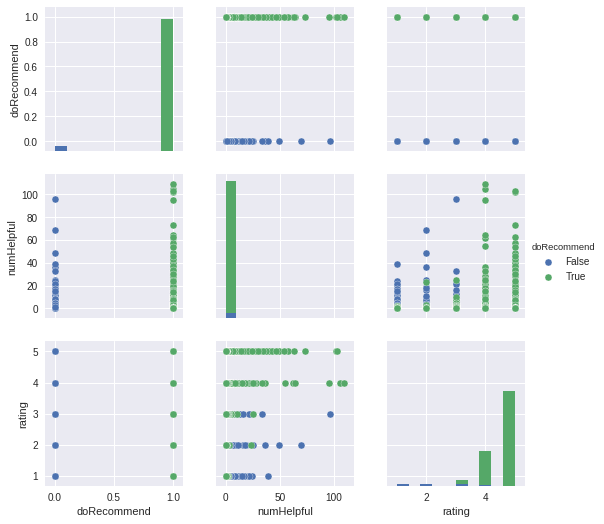

In [18]:
sns.pairplot(data=dt, hue="doRecommend")

In [0]:
#sns.distplot(dt['numHelpful'])

In [20]:
'''
fig = dt["doRecommend"].hist()
fig.text(-0.3, 100, 'Number of People', ha='center')
fig.text(0,-20, 'True', ha='center')
fig.text(1,-20, 'False', ha='center')
'''

'\nfig = dt["doRecommend"].hist()\nfig.text(-0.3, 100, \'Number of People\', ha=\'center\')\nfig.text(0,-20, \'True\', ha=\'center\')\nfig.text(1,-20, \'False\', ha=\'center\')\n'

In [0]:
#plt.bar(dt['rating'],dt['doRecommend'])
#plt.xlabel("rating")
#plt.ylabel("doRecommend")
#plt.figure()

##2. To find whether the ratings are genuine

Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


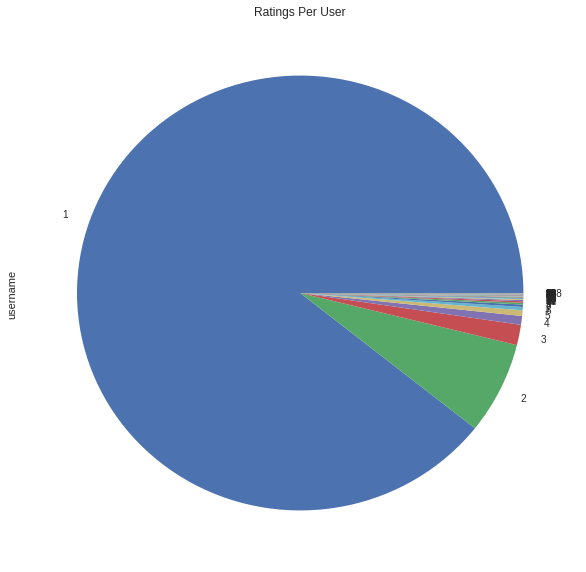

In [22]:
rating_perperson=dt.username.value_counts()
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

From the pie chart it can be seen that most of the user shave given single rating , but it can also been observed
-Though Bulk users are around 0.55%, they contribute to 9% of ratings which is something odd

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


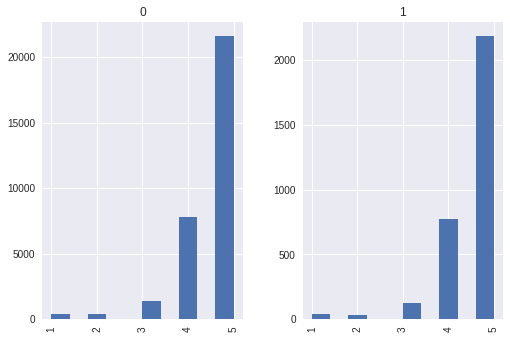

In [23]:
dt['bulk']= dt['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(dt.rating.hist(by=dt.bulk))
print(dt[dt.bulk==1].rating.describe())
print(dt[dt.bulk==0].rating.describe())


it can be seen that bulk users have same distrubution as other users , so they cannot be classified as spam

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


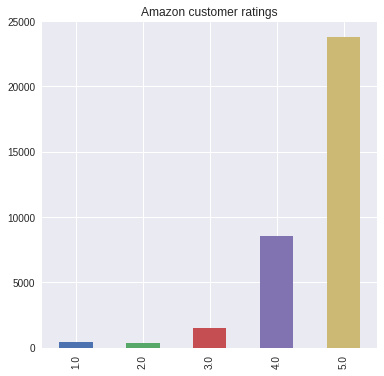

In [24]:
from matplotlib import pyplot
%matplotlib inline

star = dt.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

### To find the NPS score of Amazon

The users who gave rating 5 are <b>Promoters </b>

The users who gave rating 1,2,3, are <b>Detractors </b>

The users who gave rating 4 are <b>Passive </b>

NPS SCORE = (Promoters - Detractors)/total_ratings * 100


In [25]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))


 NPS score of Amazon is : 61.99


NPS score is good for Amazon around 62%

### Selecting a product - fire tablet 8 and analyze the characteristics

In [26]:
len(dt.name.unique())

49

In [27]:
dt.name.unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,',
       'Kindle Keyboard,,,\r\nKindle Keyboard,,,',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
       'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
       'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,',
       'Amazon Kindle Fire Hd (3rd Generation)

In [28]:
dt.name.value_counts()

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                                                                                                                              10966
Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                   3309
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,                                                                                                            3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                                                                                                                              2814
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                          

In [29]:

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state() 

In [30]:
#plotly fix
configure_plotly_browser_state()

## target count ##
cnt_srs = dt['name'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

#configure_plotly_browser_state()
# target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=1200,
    height=1000,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

It is evident from the graph, Fire Tablet 7 with 8 inch Display, Wi-Fi, 8 GB -Includes Special Offers, Magenta  has highest number of ratings with nearly 10970 people. So i  am choosing the firetablet 7 product Magenta and analyzing its characteristics

In [0]:
firetab= dt[dt.name=='Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta']

In [32]:
firetab.head(10)

,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,doRecommend,numHelpful,rating,sourceURLs,text,title,username,bulk
3480,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-10-07T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,The sales people are really nice and knowledge...,Great product,richard,0
3481,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-10-07T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,Great product and service and the sales man r ...,Great product,richard,0
3482,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-10-07T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,Great product and service will refer to a frie...,Great product and service,richard,0
3483,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-10-06T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,very good product and service will refer a fri...,very good product and service.,Richard,1
3484,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-30T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,Great selections. Hard to find assistance at t...,Good selection.,Scheu,0
3485,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-24T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is a basic and easy to use eReader...,Exactly what I wanted,Shanner732,0
3486,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-20T00:00:00.000Z,NaN,2017-10-10T00:00:00Z,False,0.0,3.0,http://reviews.bestbuy.com/3545/5442403/review...,Disappointed to realize there is not a light f...,Good but not great,LMoTX,0
3487,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-06T00:00:00.000Z,NaN,"2017-09-12T00:00:00Z,2017-09-06T00:00:00Z,2017...",True,0.0,3.0,http://reviews.bestbuy.com/3545/5442403/review...,It is affordable and it had Increased storage ...,OK,paulinhala,0
3488,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-04T00:00:00.000Z,NaN,"2017-09-12T00:00:00Z,2017-09-06T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,Very good reading on this good and strong qual...,Great kindle.,Steve,1
3489,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B00ZV9PXP2,Amazon,"Electronics,iPad & Tablets,All Tablets,Compute...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-03T00:00:00.000Z,NaN,"2017-09-12T00:00:00Z,2017-09-06T00:00:00Z,2017...",False,0.0,3.0,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,0


In [33]:
firetab.isnull().sum()

name              0
asins             0
brand             0
categories        0
keys              0
manufacturer      0
date              0
dateAdded       215
dateSeen          0
doRecommend       4
numHelpful        4
rating            4
sourceURLs        0
text              0
title             0
username          1
bulk              0
dtype: int64

In [34]:
'''
firetab['dateAdded'].fillna('', inplace=True)
firetab['doRecommend'].fillna('', inplace=True)
firetab['numHelpful'].fillna('', inplace=True)
firetab['rating'].fillna('', inplace=True)
firetab['username'].fillna('', inplace=True)
'''

"\nfiretab['dateAdded'].fillna('', inplace=True)\nfiretab['doRecommend'].fillna('', inplace=True)\nfiretab['numHelpful'].fillna('', inplace=True)\nfiretab['rating'].fillna('', inplace=True)\nfiretab['username'].fillna('', inplace=True)\n"

In [35]:
firetab.isnull().sum()

name              0
asins             0
brand             0
categories        0
keys              0
manufacturer      0
date              0
dateAdded       215
dateSeen          0
doRecommend       4
numHelpful        4
rating            4
sourceURLs        0
text              0
title             0
username          1
bulk              0
dtype: int64

Now we have replaced the null values (NaN) to empty strings

In [36]:
firetab.doRecommend.value_counts()

True     10420
False      542
Name: doRecommend, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3a69abe0>,
      dtype=object)

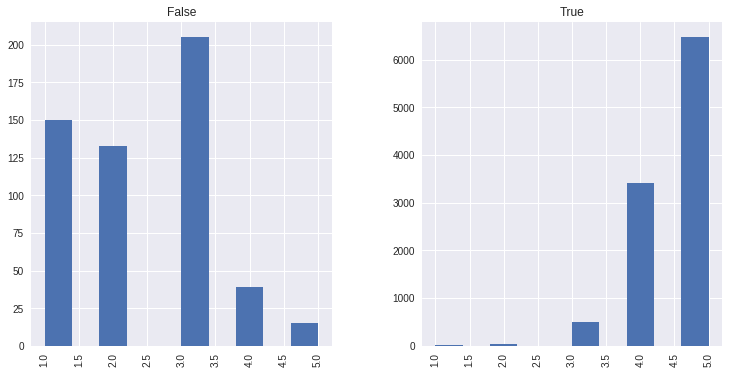

In [37]:
firetab.rating.hist(by=firetab.doRecommend,figsize=(12,6))

In [38]:
plus_firetab = firetab[firetab.doRecommend==True].rating.value_counts()
plus_firetab.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_firetab[4:5])-sum(plus_firetab[1:2]))/sum(plus_firetab),2)
minus_firetab = firetab[firetab.doRecommend==False].rating.value_counts()
minus_firetab.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_firetab[4:5])-sum(minus_firetab[1:2]))/sum(minus_firetab),2)
print("Those who recommend amazon firetab generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend firetab produce a NPS score of " + str(notrecomm_NPS))
print(" ~ pretty much correct definition of NPS score")


Those who recommend amazon firetab generate high NPS score of 94.44
Those who DO NOT recommend firetab produce a NPS score of -42.25
 ~ pretty much correct definition of NPS score


In [39]:
!pip install wordcloud
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

### Word cloud for recommended reviews

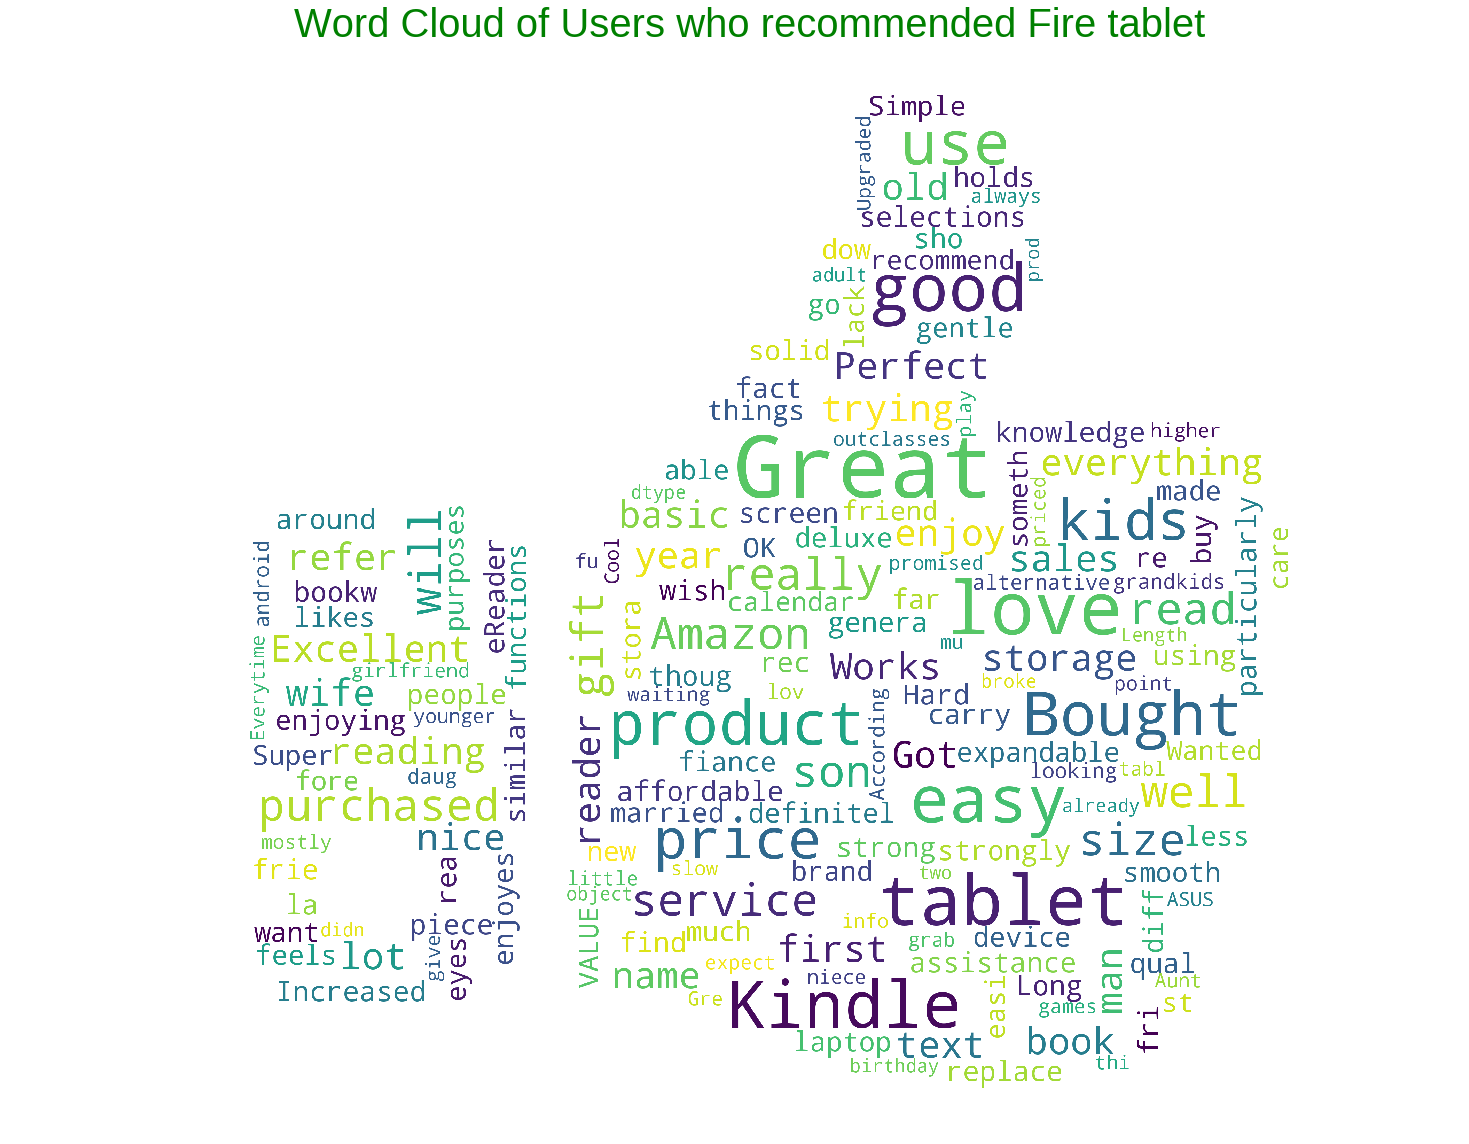

In [40]:

from PIL import Image
from io import BytesIO
response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
recom_firetab = firetab[firetab.doRecommend==True].text
plot_wordcloud(recom_firetab, upvote_mask, max_words=30000, max_font_size=250, title="Word Cloud of Users who recommended Fire tablet")

### Word cloud for not recommended reviews

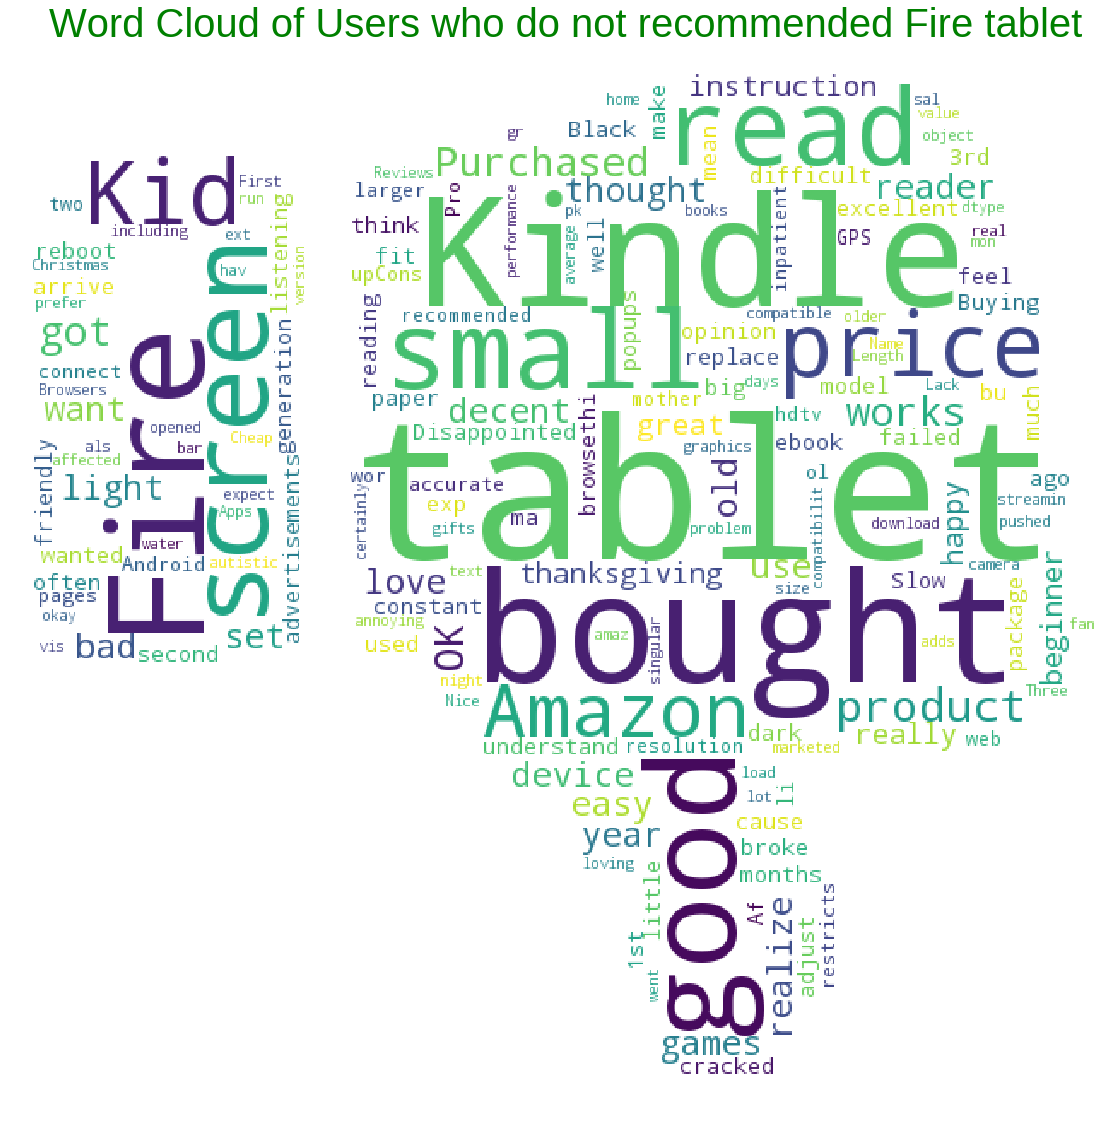

In [41]:
response = requests.get('https://image.freepik.com/free-icon/thumbs-down-silhouette_318-41911.jpg')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
no_recom_firetab = firetab[firetab.doRecommend==False].text
plot_wordcloud(no_recom_firetab, upvote_mask, max_words=30000, max_font_size=250, title="Word Cloud of Users who do not recommended Fire tablet")

### Plot time series graph for the review for the time intervals

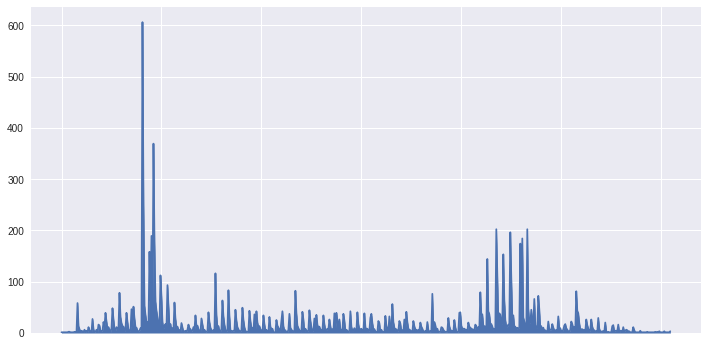

In [42]:
firetab['temp'] = firetab.date.apply(lambda x : pd.to_datetime(x))
firetab_review_dates = firetab.date.value_counts()
firetab_review_dates.sort_index(inplace=True)
firetab_review_dates.plot(kind='area',figsize=(12,6))

In [43]:
rating_perdate = firetab_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()

1     11
12     6
3      2
6      1
dtype: int64

It can be seen that January has higher sales activity followed by December.
March and June have similar number of reviews for this product

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd38062b70>]],
      dtype=object)

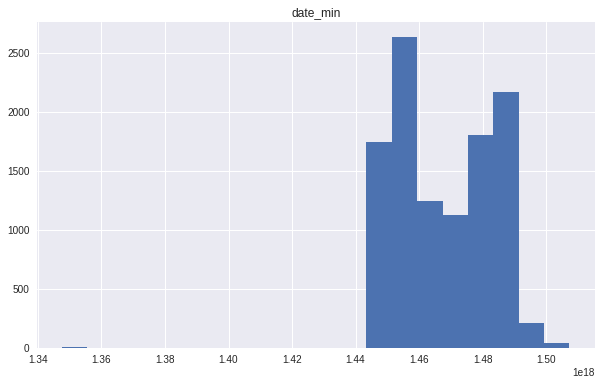

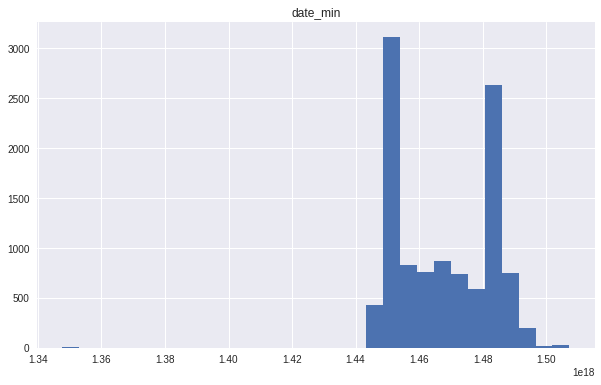

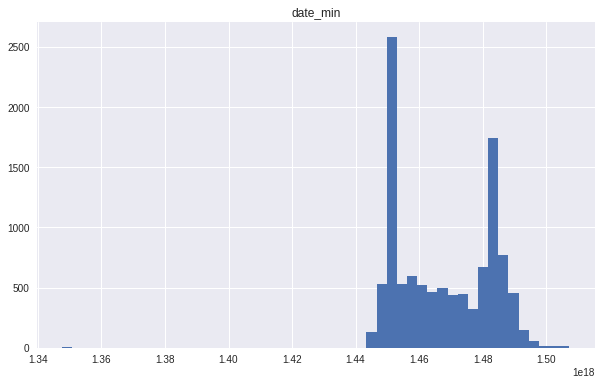

In [44]:
rating_series = pd.DataFrame(firetab.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))

In [0]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)   

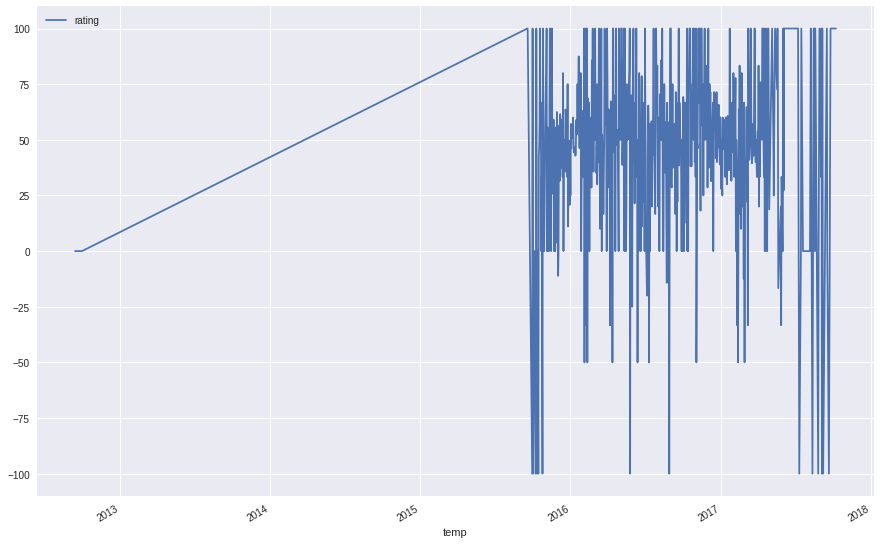

In [46]:
NPS_overtime = firetab[['temp','rating']]
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(15,10))


###NPS MONTHLY PLOT

AxesSubplot(0.125,0.125;0.775x0.755)


,rating
timeline,
-27,0.000000
-26,0.000000
31,25.000000
9,33.333333
32,33.333333
33,35.714286
10,37.500000
29,39.130435
11,41.509434


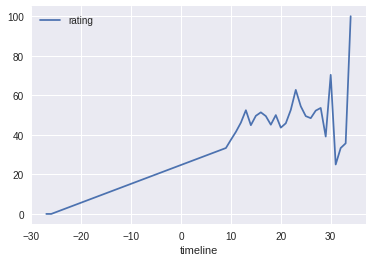

In [47]:
NPS_overtime['timeline']= NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2015))))
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
print(NPS_by_month.plot())
NPS_by_month.sort_values(by='rating')

It can be seen that reviews have increased for Firetablet and NPS performance has increased over the period of time

## To Predict recommendation based on the content of reviews

In [48]:
comments = pd.concat([firetab['text']+". "+ firetab['title'],firetab['rating'],firetab['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']
comments.head()

,text,rating,recommend
3480,The sales people are really nice and knowledge...,5.0,True
3481,Great product and service and the sales man r ...,5.0,True
3482,Great product and service will refer to a frie...,5.0,True
3483,very good product and service will refer a fri...,5.0,True
3484,Great selections. Hard to find assistance at t...,5.0,True


In [49]:
!pip install nltk


In [50]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### To fine the word count of review content

In [51]:
comments['word_count'] = comments['text'].apply(lambda x: len(str(x).split(" ")))
comments.head()

,text,rating,recommend,word_count
3480,The sales people are really nice and knowledge...,5.0,True,17
3481,Great product and service and the sales man r ...,5.0,True,13
3482,Great product and service will refer to a frie...,5.0,True,19
3483,very good product and service will refer a fri...,5.0,True,14
3484,Great selections. Hard to find assistance at t...,5.0,True,10


### To fine the character count of review content

In [52]:
comments['char_count'] = comments['text'].str.len() ## this also includes spaces
comments.head()

,text,rating,recommend,word_count,char_count
3480,The sales people are really nice and knowledge...,5.0,True,17,94
3481,Great product and service and the sales man r ...,5.0,True,13,73
3482,Great product and service will refer to a frie...,5.0,True,19,101
3483,very good product and service will refer a fri...,5.0,True,14,82
3484,Great selections. Hard to find assistance at t...,5.0,True,10,68


### to find the average length of words in the reviews

In [53]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

comments['avg_word'] = comments['text'].apply(lambda x: avg_word(x))
comments.head()

,text,rating,recommend,word_count,char_count,avg_word
3480,The sales people are really nice and knowledge...,5.0,True,17,94,4.588235
3481,Great product and service and the sales man r ...,5.0,True,13,73,4.692308
3482,Great product and service will refer to a frie...,5.0,True,19,101,4.368421
3483,very good product and service will refer a fri...,5.0,True,14,82,4.928571
3484,Great selections. Hard to find assistance at t...,5.0,True,10,68,5.900000


### to  find the number of stop words in review

In [54]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

comments['stopwords'] = comments['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
comments.head()

,text,rating,recommend,word_count,char_count,avg_word,stopwords
3480,The sales people are really nice and knowledge...,5.0,True,17,94,4.588235,5
3481,Great product and service and the sales man r ...,5.0,True,13,73,4.692308,3
3482,Great product and service will refer to a frie...,5.0,True,19,101,4.368421,6
3483,very good product and service will refer a fri...,5.0,True,14,82,4.928571,6
3484,Great selections. Hard to find assistance at t...,5.0,True,10,68,5.900000,2


### to find numbers in contents of review

In [55]:
comments['numerics'] = comments['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
comments.head()

,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics
3480,The sales people are really nice and knowledge...,5.0,True,17,94,4.588235,5,0
3481,Great product and service and the sales man r ...,5.0,True,13,73,4.692308,3,0
3482,Great product and service will refer to a frie...,5.0,True,19,101,4.368421,6,0
3483,very good product and service will refer a fri...,5.0,True,14,82,4.928571,6,0
3484,Great selections. Hard to find assistance at t...,5.0,True,10,68,5.900000,2,0


### to find uppercase in review

In [56]:
comments['uppercase'] = comments['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
comments.head()

,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics,uppercase
3480,The sales people are really nice and knowledge...,5.0,True,17,94,4.588235,5,0,1
3481,Great product and service and the sales man r ...,5.0,True,13,73,4.692308,3,0,0
3482,Great product and service will refer to a frie...,5.0,True,19,101,4.368421,6,0,0
3483,very good product and service will refer a fri...,5.0,True,14,82,4.928571,6,0,0
3484,Great selections. Hard to find assistance at t...,5.0,True,10,68,5.900000,2,0,0


### to find the unique number of words

In [57]:
comments["num_unique_words"] = comments["text"].apply(lambda x: len(set(str(x).split())))
comments.head()

,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics,uppercase,num_unique_words
3480,The sales people are really nice and knowledge...,5.0,True,17,94,4.588235,5,0,1,17
3481,Great product and service and the sales man r ...,5.0,True,13,73,4.692308,3,0,0,10
3482,Great product and service will refer to a frie...,5.0,True,19,101,4.368421,6,0,0,15
3483,very good product and service will refer a fri...,5.0,True,14,82,4.928571,6,0,0,10
3484,Great selections. Hard to find assistance at t...,5.0,True,10,68,5.900000,2,0,0,10


## Preprocessing steps

### Lower case conversion

In [58]:
comments['text'] = comments['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
comments['text'].head()

3480    the sales people are really nice and knowledge...
3481    great product and service and the sales man r ...
3482    great product and service will refer to a frie...
3483    very good product and service will refer a fri...
3484    great selections. hard to find assistance at t...
Name: text, dtype: object

### Remove Punctuation

In [59]:
comments['text'] = comments['text'].str.replace('[^\w\s]','')
comments['text'].head()

3480    the sales people are really nice and knowledge...
3481    great product and service and the sales man r ...
3482    great product and service will refer to a frie...
3483    very good product and service will refer a fri...
3484    great selections hard to find assistance at ti...
Name: text, dtype: object

### Remove stop words

In [60]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
comments['text'] = comments['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
comments['text'].head()

3480    sales people really nice knowledgeable come ba...
3481    great product service sales man r really nice ...
3482    great product service refer friend sales man r...
3483    good product service refer friend good product...
3484    great selections hard find assistance times go...
Name: text, dtype: object

### Correcting spelling errors

In [61]:
!pip install -U textblob

from textblob import TextBlob
'''
comments['text'] = comments['text'].apply(lambda x: str(TextBlob(x).correct()))
comments['text'].head()
'''

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.2)


"\ncomments['text'] = comments['text'].apply(lambda x: str(TextBlob(x).correct()))\ncomments['text'].head()\n"

### Stemming and Lemmatization

In [62]:
import string
import nltk
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


#### Applying Stemming the review column

In [63]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
comments['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

3480     sale peopl realli nice knowledg come back grea...
3481     great product servic sale man r realli nice gr...
3482     great product servic refer friend sale man r g...
3483     good product servic refer friend good product ...
3484        great select hard find assist time good select
3485     kindl basic easi use eread exactli want charg ...
3486     disappoint realiz light night read size weight...
3487     afford increas storag backlight screen could b...
3488       good read good strong qualiti kindl great kindl
3489     thought would big small paper turn like palm t...
3490     particularli like fact text show see well outs...
3491     like e reader wish screen higher resolut requi...
3492     purchas product love read buy book got costli ...
3493     realli good read lot doesnt strain eye light w...
3494     excel product good piec strongli recommend gre...
3495     amazon kindl good gift bookworm life lightweig...
3496     tri get son read thought kindl would help firs.

#### Applying Lemmatization on review column

Lemmatization is a better than  stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [64]:

from textblob import Word
comments['text'] = comments['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
comments['text'].head()

3480    sale people really nice knowledgeable come bac...
3481    great product service sale man r really nice g...
3482    great product service refer friend sale man r ...
3483    good product service refer friend good product...
3484    great selection hard find assistance time good...
Name: text, dtype: object

### Performing distillation on the Amazon review of Fire Tablet

#### Feature identification

We use the text reviews as the feature for performing distillation

In [0]:
recom_com_firetab = comments[comments.recommend==True].text
no_recom_com_firetab = comments[comments.recommend==False].text

#### Finding the number of users who recommended Fire tablet

In [66]:
comments[comments.recommend==True].text.value_counts().sum()

10420

#### Finding the number of users who did not recommended Fire tablet

In [67]:
comments[comments.recommend==False].text.value_counts().sum()

542

It is observed from the dataset that more than 10000 people recommended Fire tablet 

#### Generate word frequency count plot

In [0]:

from collections import defaultdict

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [69]:
from plotly import tools
configure_plotly_browser_state()

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in recom_com_firetab:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in no_recom_com_firetab:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words used in reviews that recommended fire tablet ", 
                                          "Frequent words used in reviews that did not recommended fire tablet"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Frequent Word  Plots")
py.iplot(fig, filename='word-plots')



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



#### Generate bigram plot

In [70]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in recom_com_firetab:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in no_recom_com_firetab:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of recommended reviews", 
                                          "Frequent bigrams of not recommended review"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



####Generater trigram plot

In [71]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in recom_com_firetab:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in no_recom_com_firetab:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of recommended reviews", 
                                          "Frequent trigrams of not recommended reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



###Compound feature 
Choosing review text  as the compound feature






### Sentiment Analysis using Vader
  Generating polarity score for the review

In [72]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))
comments.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics,uppercase,num_unique_words,sentiment
3480,sale people really nice knowledgeable come bac...,5.0,True,17,94,4.588235,5,0,1,17,0.8016
3481,great product service sale man r really nice g...,5.0,True,13,73,4.692308,3,0,0,10,0.9061
3482,great product service refer friend sale man r ...,5.0,True,19,101,4.368421,6,0,0,15,0.9360
3483,good product service refer friend good product...,5.0,True,14,82,4.928571,6,0,0,10,0.8402
3484,great selection hard find assistance time good...,5.0,True,10,68,5.900000,2,0,0,10,0.7650


It has been observed that the reviews with high rating had postive sentiment that is closer to 1

####Length of review after  pre processing

In [73]:
# Feature 2 : Length of string

comments['length_after'] = comments['text'].apply(lambda x : len(re.split('\W+',x)))
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics,uppercase,num_unique_words,sentiment,length_after,target_rec
3480,sale people really nice knowledgeable come bac...,5.0,True,17,94,4.588235,5,0,1,17,0.8016,9,1
3481,great product service sale man r really nice g...,5.0,True,13,73,4.692308,3,0,0,10,0.9061,10,1
3482,great product service refer friend sale man r ...,5.0,True,19,101,4.368421,6,0,0,15,0.9360,12,1
3483,good product service refer friend good product...,5.0,True,14,82,4.928571,6,0,0,10,0.8402,8,1
3484,great selection hard find assistance time good...,5.0,True,10,68,5.900000,2,0,0,10,0.7650,8,1


#### To view the records with lowest rating and targetted recommendation of zero( not recommend)

In [74]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics,uppercase,num_unique_words,sentiment,length_after,target_rec
3544,used kindle fire love light read dark hard nav...,1.0,False,32,151,3.750000,11,0,3,30,0.8073,14,0
3824,device ok reading listening audiobooks via ove...,1.0,False,34,216,5.382353,10,0,1,32,0.0232,23,0
3853,kid friendly purchased little nephew wasnt giv...,1.0,False,22,129,4.909091,6,0,0,21,0.0258,14,0
3855,screen cracked package arrive earlier expected...,1.0,False,13,83,5.461538,5,0,0,13,-0.4767,8,0
3900,purchased two tablet 47 dead pixel screen read...,1.0,False,47,248,4.297872,19,1,1,44,-0.8625,25,0


#### Analyzing parts of speech in the review content

In [75]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

text_pos = [TextBlob(w.lower(), tokenizer=tokenizer).tags for w in comments.text]
text_pos[0]


[('sale', 'NN'),
 ('people', 'NNS'),
 ('really', 'RB'),
 ('nice', 'JJ'),
 ('knowledgeable', 'JJ'),
 ('come', 'VBN'),
 ('back', 'RB'),
 ('great', 'JJ'),
 ('product', 'NN')]

In [76]:
tags_counts = []
for row in text_pos:
    tags = [n[1] for n in row]
    tags_counts.append(tags)
    title_parts_of_speech = []
for n in tags_counts:
    foo = dict(pd.Series(n).value_counts(normalize=True))
    title_parts_of_speech.append(foo)
title_parts_of_speech = pd.DataFrame(title_parts_of_speech).fillna(0)
title_parts_of_speech.head()

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.000,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000000,0.000000,0.1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000000,0.125000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,...,0.125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [0]:
title_parts_of_speech.columns = [str(n) + '_title' for n in title_parts_of_speech.columns]

In [78]:
title_parts_of_speech.describe().T.sort_values('mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
NN_title,10966.0,0.454986,0.124609,0.0,0.375000,0.451613,0.538462,1.000000
JJ_title,10966.0,0.260693,0.115110,0.0,0.181818,0.250000,0.333333,1.000000
RB_title,10966.0,0.056302,0.065864,0.0,0.000000,0.041667,0.100000,0.428571
VBD_title,10966.0,0.039012,0.055016,0.0,0.000000,0.000000,0.071429,0.500000
VB_title,10966.0,0.033520,0.052447,0.0,0.000000,0.000000,0.062500,0.428571


### Feature extraction with TF -IDF

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))


Stemmed - 6533
Lemmatized - 7966


It can be seen that Lemmatiation has 17.98% more feature than stemming. Stemming has lower features that would be effective for modeliing. So we we will go ahead with stemming

####Stemmed data look

In [80]:
pd.DataFrame(textfeatures.toarray()).head(15)

,0,1,2,3,4,5,6,7,8,9,...,6523,6524,6525,6526,6527,6528,6529,6530,6531,6532
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,sale,peopl,realli,nice,knowledg,come,back,great,product,servic,...,on,rad,strang,naviag,fore,windowsbas,lockeddown,outclass,facial,ise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
sale,1.212802
peopl,0.522939
realli,19.780027
nice,33.655996
knowledg,10.010809
come,1.864522
back,0.583728
great,0.113202
product,1.244057
servic,0.627106


#### To see most important words in the reviews and  words used by many people or less frequent in sentences

In [83]:

sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
surviv,0.060882
began,0.060882
speech,0.060882
star,0.060882
xpectat,0.060882


In [84]:
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
mc,916.133190
tabletif,891.094922
breez,548.740331
ampl,526.588678
public,498.435602


### Topic Modelling

#### LDA with count vectorizer

In [85]:
#Cleaning and tokenizing
# perform lemmatize and stem preprocessing steps on the data set
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
'''
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()#Stemmers remove morphological affixes from words, leaving only the word

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
  '''

"\nfrom nltk.stem import WordNetLemmatizer, SnowballStemmer\nfrom nltk.stem.porter import *\nstemmer = PorterStemmer()#Stemmers remove morphological affixes from words, leaving only the word\n\ndef lemmatize_stemming(text):\n    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))\ndef preprocess(text):\n    result = []\n    for token in gensim.utils.simple_preprocess(text):\n        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:\n            result.append(lemmatize_stemming(token))\n    return result\n  "

In [86]:
# Preprocess the headline text, saving the results as ‘processed_docs’
'''
processed_docs = comments.text.map(preprocess)  # if want to see only toxic topics df[df['istoxic']>0].comment_text
processed_docs[:10]
'''

"\nprocessed_docs = comments.text.map(preprocess)  # if want to see only toxic topics df[df['istoxic']>0].comment_text\nprocessed_docs[:10]\n"

### Creating LDA model

In [87]:
message_docs = comments.text.tolist()
!pip install lda
import lda
from sklearn.feature_extraction.text import CountVectorizer

n_topics = 20 # number of topics
n_iter = 500 # number of iterations

# vectorizer: ignore English stopwords & words that occur less than 5 times
cvectorizer = CountVectorizer(min_df=5, stop_words='english')
cvz = cvectorizer.fit_transform(message_docs)
# train an LDA model
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)

    100% |████████████████████████████████| 358kB 23.0MB/s 
    100% |████████████████████████████████| 102kB 28.2MB/s 


In [88]:
X_topics = lda_model.fit_transform(cvz)

INFO:lda:n_documents: 10966
INFO:lda:vocab_size: 1892
INFO:lda:n_words: 152776
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1595744
INFO:lda:<10> log likelihood: -1133044
INFO:lda:<20> log likelihood: -1071771
INFO:lda:<30> log likelihood: -1044126
INFO:lda:<40> log likelihood: -1030392
INFO:lda:<50> log likelihood: -1022205
INFO:lda:<60> log likelihood: -1016563
INFO:lda:<70> log likelihood: -1012532
INFO:lda:<80> log likelihood: -1008793
INFO:lda:<90> log likelihood: -1006943
INFO:lda:<100> log likelihood: -1004972
INFO:lda:<110> log likelihood: -1003153
INFO:lda:<120> log likelihood: -1002239
INFO:lda:<130> log likelihood: -1001295
INFO:lda:<140> log likelihood: -999803
INFO:lda:<150> log likelihood: -999316
INFO:lda:<160> log likelihood: -998780
INFO:lda:<170> log likelihood: -997383
INFO:lda:<180> log likelihood: -997690
INFO:lda:<190> log likelihood: -997048
INFO:lda:<200> log likelihood: -997438
INFO:lda:<210> log likelihood: -996576
INFO:lda:<220> lo

In [0]:
#add a threshold factor that would help filter out unconfident topic assignments. Other wise visualization will be busy
threshold = 0.5
_idx = np.amax(X_topics, axis=1) > threshold 
X_topics = X_topics[_idx]

#### Using TSNE to reduce  to 2 Dimensions

In [90]:
from sklearn.manifold import TSNE

# a t-SNE model
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3453 samples in 0.003s...
[t-SNE] Computed neighbors for 3453 samples in 0.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3453
[t-SNE] Computed conditional probabilities for sample 2000 / 3453
[t-SNE] Computed conditional probabilities for sample 3000 / 3453
[t-SNE] Computed conditional probabilities for sample 3453 / 3453
[t-SNE] Mean sigma: 0.090098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.123955
[t-SNE] KL divergence after 1000 iterations: 0.683483


#### Visualizing topics

In [91]:
#First we do some setup work (import classes & functions, set params, etc.)
!pip install bokeh
import numpy as np
from bokeh.plotting import save
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import  output_notebook
from bokeh.models import HoverTool

n_top_words = 5 # number of keywords we show

# 20 colors
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

In [0]:
#Then we find the most likely topic for each news
_lda_keys = []
for i in range(X_topics.shape[0]):
  _lda_keys +=  X_topics[i].argmax(),

In [0]:
# get top words for each topic
topic_summaries = []
topic_word = lda_model.topic_word_  # all topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
  topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
  topic_summaries.append(' '.join(topic_words)) # append!

In [94]:
# plot the news (each point representing one news)
#output_notebook()
title = 'Commant LDA viz'
num_example = len(X_topics)

plot_lda = figure(plot_width=1400, plot_height=1100,
                    title=title,
                    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                    x_axis_type=None, y_axis_type=None, min_border=1)
source = ColumnDataSource(
        data=dict(
            x= tsne_lda[:, 0], #tsne_lda.iloc[:, 0],
            y= tsne_lda[:, 1], #tsne_lda.iloc[:, 1],
            content= message_docs[:num_example],
            topic_key= _lda_keys[:num_example],
            c=colormap[_lda_keys][:num_example]
        )
    )

plot_lda.circle('x', 'y', source=source, color='c')

GlyphRenderer(id='1031', ...)

In [95]:
#plot the crucial words for each topic and tooltip
# randomly choose a news (within a topic) coordinate as the crucial words coordinate
output_notebook() # must be called in same cell
topic_coord = np.empty((X_topics.shape[1], 2)) * np.nan
for topic_num in _lda_keys:
  if not np.isnan(topic_coord).any():
    break
  topic_coord[topic_num] = tsne_lda[_lda_keys.index(topic_num)]

# plot crucial words
for i in range(X_topics.shape[1]):
  plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}

show(plot_lda)

Loading BokehJS ...

### Word2VEC

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in comments["text"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [0]:
corpus = build_corpus(data)        
#corpus[0:2] # can see individual tokens

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 166925 words, keeping 7528 word types
INFO:gensim.models.word2vec:collected 7984 word types from a corpus of 183628 raw words and 10966 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=500 retains 56 unique words (0% of original 7984, drops 7928)
INFO:gensim.models.word2vec:effective_min_count=500 leaves 82586 word corpus (44% of original 183628, drops 101042)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 7984 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 56 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 22543 word corpus (27.3% of prior 82586)
INFO:gensim.models.base_any2vec:estimated required memory for 56 words and 100 dimensions: 7280

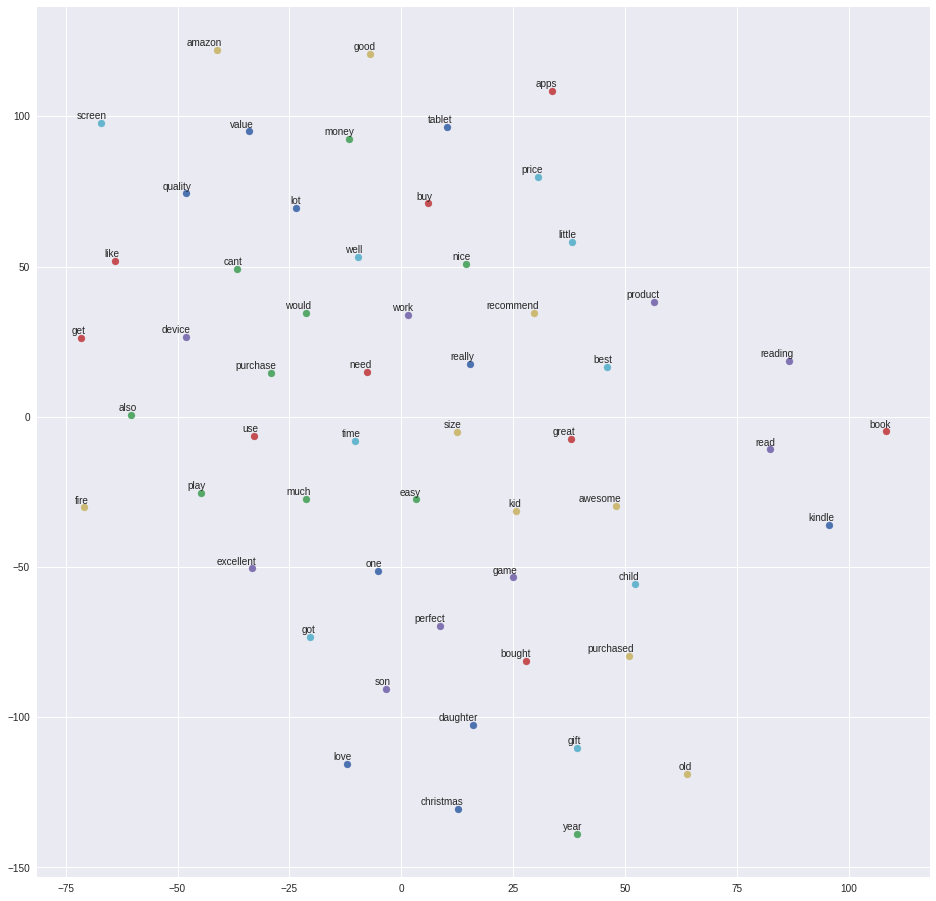

In [100]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

In [101]:
comments.head()

,text,rating,recommend,word_count,char_count,avg_word,stopwords,numerics,uppercase,num_unique_words,sentiment,length_after,target_rec
3480,sale people really nice knowledgeable come bac...,5.0,True,17,94,4.588235,5,0,1,17,0.8016,9,1
3481,great product service sale man r really nice g...,5.0,True,13,73,4.692308,3,0,0,10,0.9061,10,1
3482,great product service refer friend sale man r ...,5.0,True,19,101,4.368421,6,0,0,15,0.9360,12,1
3483,good product service refer friend good product...,5.0,True,14,82,4.928571,6,0,0,10,0.8402,8,1
3484,great selection hard find assistance time good...,5.0,True,10,68,5.900000,2,0,0,10,0.7650,8,1


###  Classification Model

We perform classification to determin whether the model is able to predict whether the user recommends fire tablet or not . First we form train and test  split of the dataset. I have chosen 85 % for training and 15 % for the test set .

We create a pipeline of different Classification models using Scikit learn's Pipeline and perform K fold validation to cross check the model validation scores.  Since this dataset is very large with more than 34k rows , i have chosen k as 2 for faster computation

List of classification algorithms used in the Pipeline

        1.Logistic Regression
        2. K nearest Neighbours
        3. Decision Tree
        4. Random forests
        5. Naive Bayes
        6. XGBoost classifier
        

In [0]:

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length_after.reset_index()['length_after']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.15)


LR: 0.996280 (0.000341)
KNN: 0.994139 (0.000231)
CART: 0.974753 (0.000654)
NB: 0.625313 (0.027615)
RF: 0.998085 (0.000787)
SVM: 0.996506 (0.000110)
XGB: 0.996506 (0.000110)


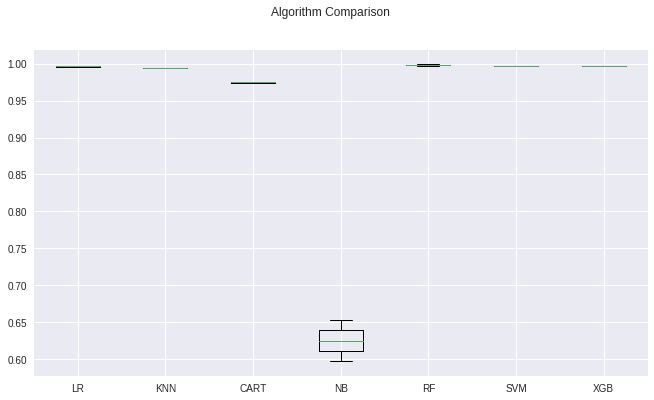

In [103]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto',kernel='linear')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'
#scoring = ['precision', 'recall', 'f1']
for name, model in models:
        kfold = KFold(n_splits=2, random_state=0)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

After comparing all the classification models in the pipeline , it is observed that Random forests classification algorithm performs best in terms of accuracy of 99.7% . We will further drill down the model validation metrics of  Random forest classifier by performing Random forest classification individually without the Kfold

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rfc_pred = rfc.predict(x_test)

Top 20 important features described by Random forest classifier

In [106]:
sorted(zip(rfc.feature_importances_,x_train.columns),reverse=True)[0:20]

[(0.04145223588498616, 'sentiment'),
 (0.018896227556057636, 'slimlp'),
 (0.017127624600989877, 'daysth'),
 (0.01464387050215678, 'length_after'),
 (0.013421513892408974, 'tabletif'),
 (0.01095466984061292, 'annual'),
 (0.008351185531695494, 'mc'),
 (0.008198499906457282, 'spot'),
 (0.007460135241346117, 'disturb'),
 (0.006631069533960346, 'public'),
 (0.0064968619965683925, '32g'),
 (0.0063142989165803475, 'ampl'),
 (0.005923601221129813, 'wotk'),
 (0.005591035138795669, 'soundsport'),
 (0.0055614543775970495, 'preload'),
 (0.005385456682655335, 'precari'),
 (0.005254036980010712, 'coupley'),
 (0.005253462701274942, 'breez'),
 (0.005122673727811386, 'amazonfire7tablet'),
 (0.005060475049793161, 'she')]

### Evaluating Model Validation metrics for Random forest classifier


1. Generate Classification report to find accuracy, precision, recall and F1 score
2. Generate confusion matrix to find Truth Positive( TP), Truth Negative( TN), False Positive(FP), False Negative(FN)
3. Find L1,L2 , Log loss
4. Generate ROC and Precision recall curves

<b>L1 Loss Function </b>
It is used to minimize the error which is the sum of the all the absolute differences between the true value and the predicted value.It is also called Mean absolute error

<b>L2 Loss Function</b>
It is used to minimize the error which is the sum of the all the squared differences between the true value and the predicted value. It is also called Root Mean Squared error(RMSE)

<b>F1 score</b>
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

<b> ROC</b>

Receiver Operating Characteristic (ROC) metric is used to evaluate the classifier's output quality.ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.

This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

<b>Precision-Recall</b>

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

In [0]:
from sklearn.metrics import  average_precision_score, precision_recall_curve


# Function to get Precision recall curve
def get_prec_recall (y_test,y_pred):
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score : {}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='cyan')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    return

#### Generate confusion matrix

Model Accuracy for Decision tree: 94.1033434650456


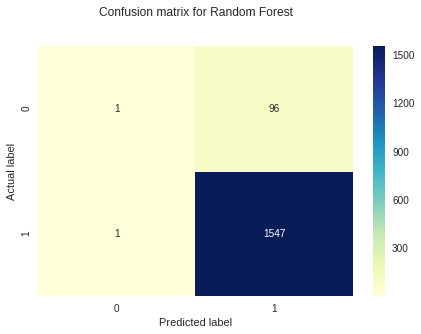

In [109]:
 #Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_rf = metrics.confusion_matrix(y_test, rfc_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, rfc_pred)  * 100)

##### Finding Precision , recall, F1  score 

In [110]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02        97
           1       0.94      1.00      0.97      1548

   micro avg       0.94      0.94      0.94      1645
   macro avg       0.72      0.50      0.49      1645
weighted avg       0.92      0.94      0.91      1645



In [111]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", metrics.accuracy_score(y_test,rfc_pred)*100 )

Accuracy :  94.1033434650456


In [112]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,rfc_pred) #y_target, y_pred

0.05896656534954407

In [113]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,rfc_pred) #y_target, y_pred

0.05896656534954407

In [114]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,rfc_pred)

2.0366796788204478

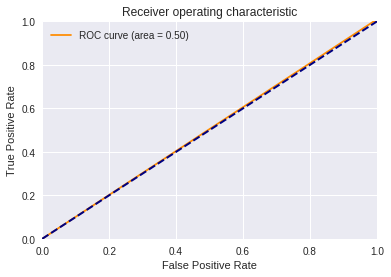

In [115]:
get_roc(y_test,rfc_pred)

Average precision-recall score : 0.941569951423835


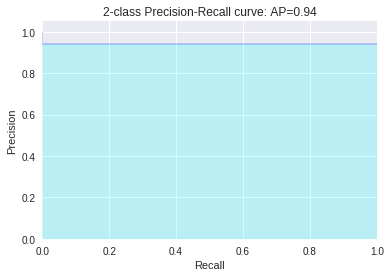

In [116]:
get_prec_recall(y_test,rfc_pred)

It has been observed that the accuracy of Random forests dropped to 95 % without kfold validation but still the accuracy is very good. The Firetablet 7  with 8GB RAM (Magenta) has very good ratings and recommended as must buy by more than 95 % of users